# Plotting

Wavespectra wraps the plotting functionality from xarray to allow easily defining frequency-direction spectral plots in polar coordinates.

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cmocean

from wavespectra import read_swan, read_era5

datadir = Path("../data")

dset = read_era5(datadir / "era5file.nc").isel(time=0)
ds = dset.isel(lat=0, lon=0, drop=True)

dset

<xarray.Dataset> Size: 288kB
Dimensions:  (freq: 30, dir: 24, lat: 5, lon: 10)
Coordinates:
  * lon      (lon) float32 40B 0.0 36.0 72.0 108.0 ... 216.0 252.0 288.0 324.0
  * lat      (lat) float32 20B 72.0 36.0 0.0 -36.0 -72.0
  * dir      (dir) float64 192B 187.5 202.5 217.5 232.5 ... 142.5 157.5 172.5
  * freq     (freq) float64 240B 0.03453 0.03798 0.04178 ... 0.4527 0.498 0.5478
    time     datetime64[ns] 8B 2019-12-01
Data variables:
    efth     (freq, dir, lat, lon) float64 288kB dask.array<chunksize=(30, 24, 5, 10), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-03-05 11:05:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

## Simplest usage

The **.plot** method is available in SpecArray. The simplest usage takes no arguments and defines sensible settings for plotting normalised spectra on logarithmic radii and countour levels:

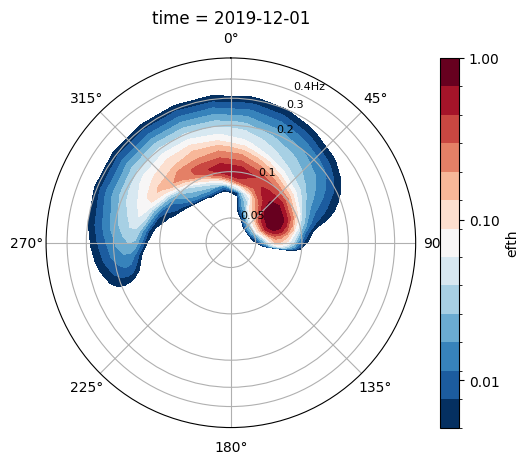

In [2]:
ds.spec.plot();

## Plotting types

Wavespectra supports xarray’s contour, contourf and pcolormesh plotting types:

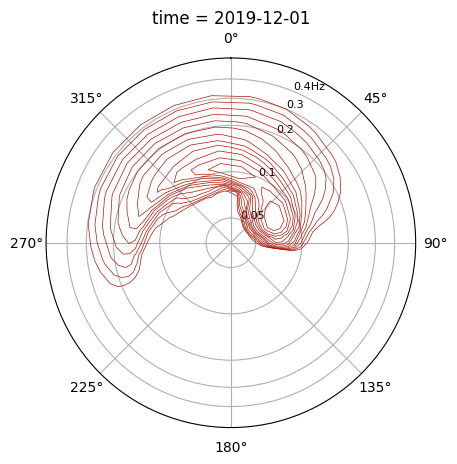

In [3]:
# Contour

ds.spec.plot(kind="contour", colors="#af1607", linewidths=0.5);

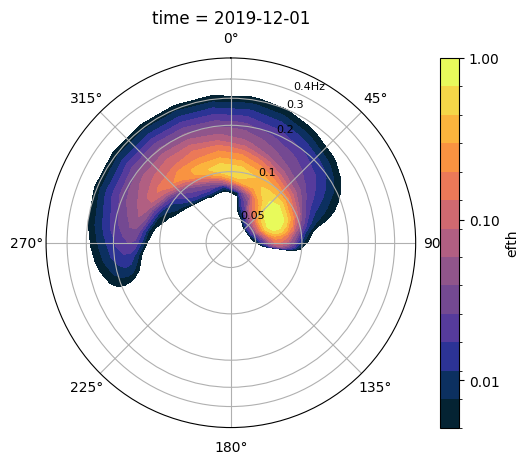

In [4]:
# Contourf

ds.spec.plot(kind="contourf", cmap=cmocean.cm.thermal);

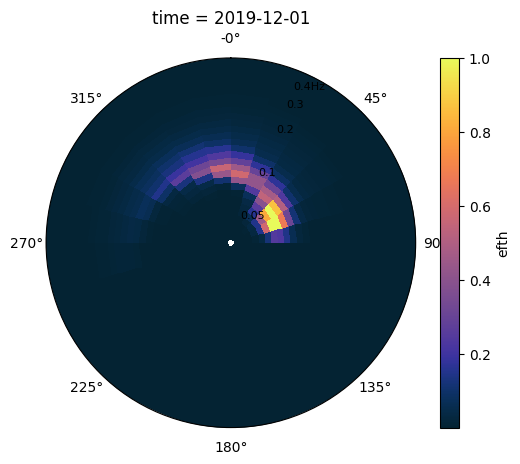

In [5]:
# Pcolormesh

ds.spec.plot(kind="pcolormesh", cmap=cmocean.cm.thermal);

## Wave period spectrum

Frequency-direction spectra can be easily plotted in the period space.

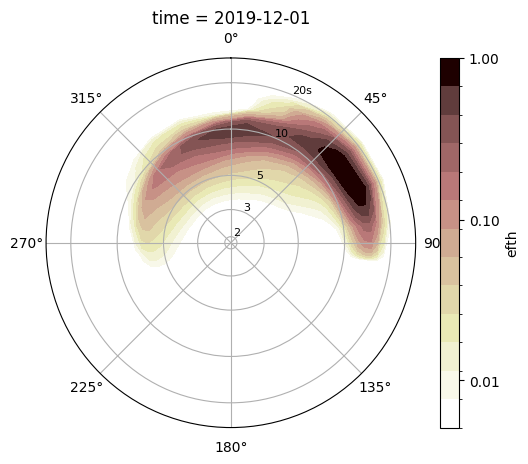

In [6]:
ds.spec.plot(as_period=True, cmap="pink_r");

## Normalised

The normalised spectrum is plotted by default but the actual values can be shown instead:

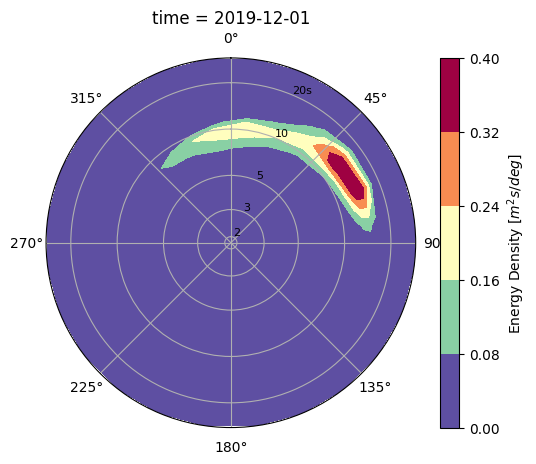

In [7]:
ds.spec.plot(as_period=True, normalised=False, cmap="Spectral_r");

Logarithmic contour levels are only default for normalised spectra but they can be still manually specified:

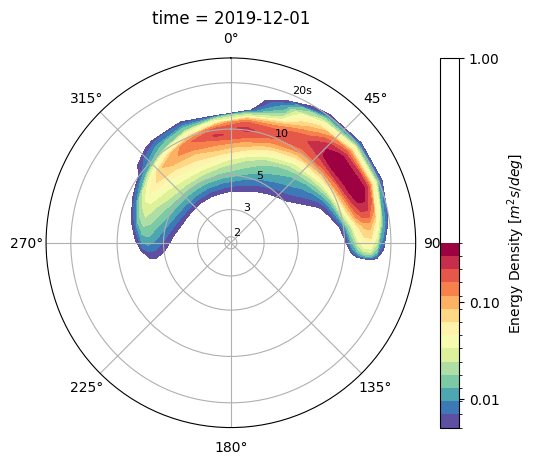

In [8]:
ds.spec.plot(
    as_period=True,
    normalised=False,
    cmap="Spectral_r",
    levels=np.logspace(np.log10(0.005), np.log10(0.4), 15),
    cbar_ticks=[0.01, 0.1, 1],
);

## Logarithmic radii

Radii are shown in a logarithmic scale by default. Linear radii can be defined by setting *logradius=False* (radii ticks can be prescribed from the radii_ticks paramater):

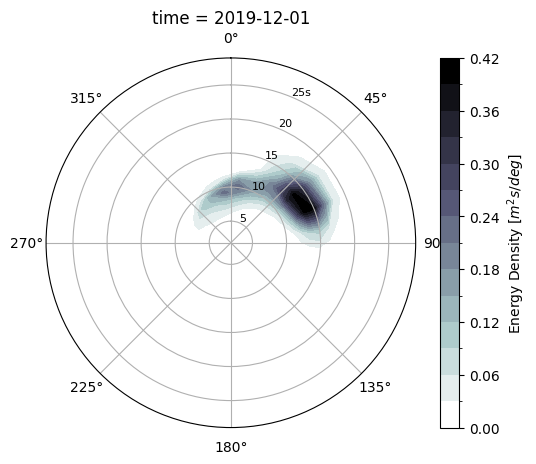

In [9]:
ds.spec.plot(
    as_period=True,
    normalised=False,
    levels=15,
    cmap="bone_r",
    logradius=False,
    radii_ticks=[5, 10, 15, 20, 25],
);

## Radii extents

The radii extents are controlled from rmin and rmax parameters:

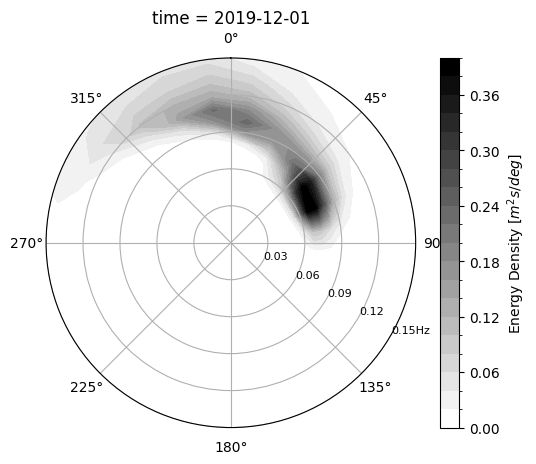

In [10]:
ds.spec.plot(
    rmin=0,
    rmax=0.15,
    logradius=False,
    normalised=False,
    levels=25,
    cmap="gray_r",
    radii_ticks=[0.03, 0.06, 0.09, 0.12, 0.15],
    radii_labels_angle=120,
    radii_labels_size=8,
);

## Faceting

Xarray’s faceting capability is fully supported.

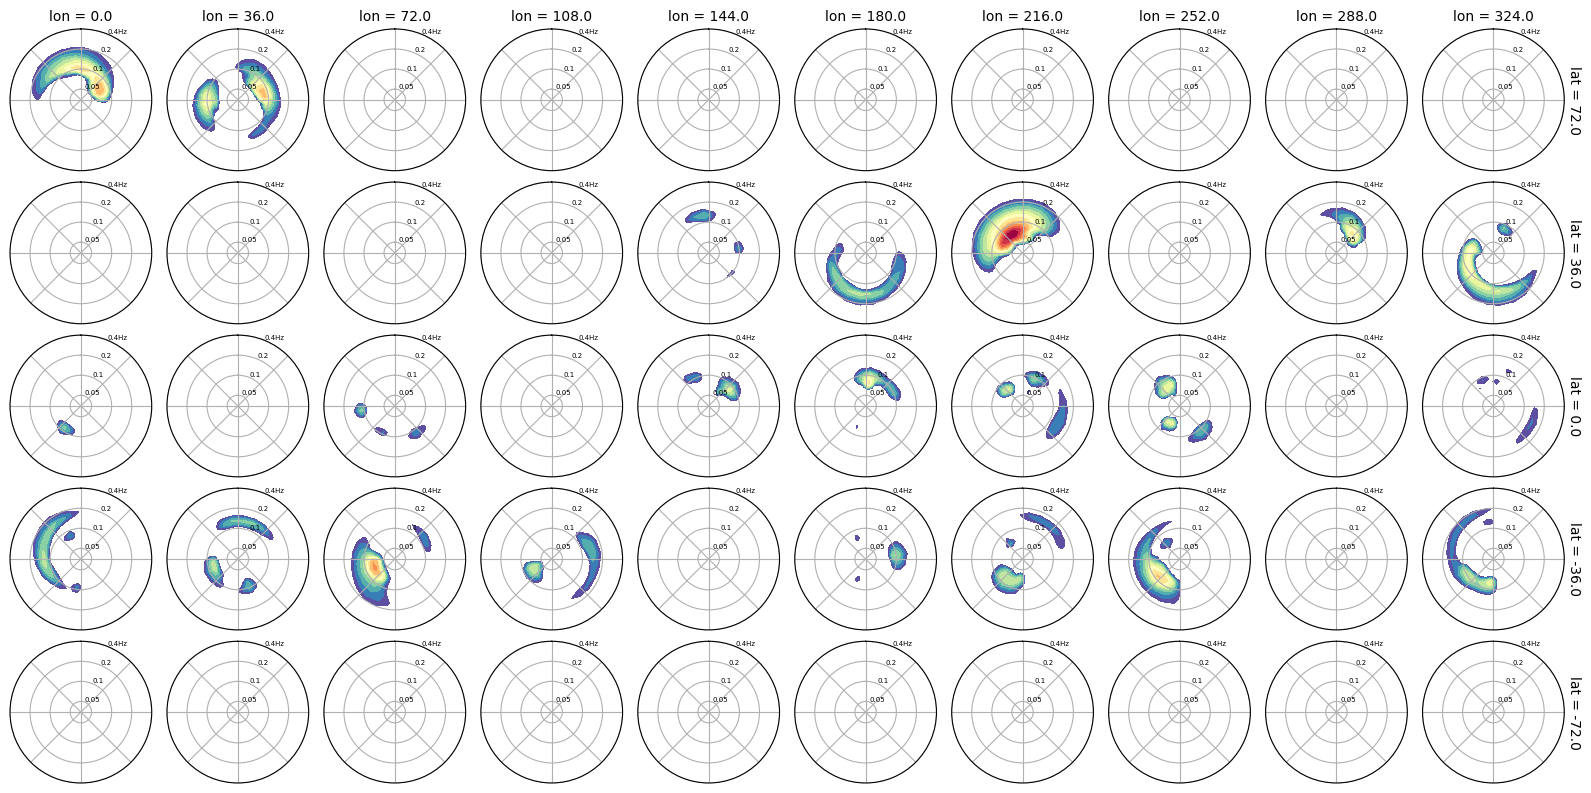

In [11]:
dset.spec.plot(
    col="lon",
    row="lat",
    figsize=(16,8),
    add_colorbar=False,
    show_theta_labels=False,
    show_radii_labels=True,
    radii_ticks=[0.05, 0.1, 0.2, 0.4],
    rmax=0.4,
    radii_labels_size=5,
    cmap="Spectral_r",
);
plt.tight_layout();